Daten einlesen

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Schon am Anfang beginnen die ersten Probleme aufzutauchen, denn wie wir wissen fehlen gewisse Daten in der Datenstruktur. Um die möglichkeit frei zu behalten zu einem späteren Zeitpunkt fehlender Werte zu ergänzen oder zu filtern haben wir uns für die funktion `genfromtxt` entschieden, denn diese ermöglicht es uns fehlende Werte zu filtern oder zu ergänzen 

In einem nächsten Schritt werden die explizite Daten der Wetterstation in **Bern** gefiltert. 

In [41]:
# Hier hat man genfromtxt() benutzt, um die Daten aus der CSV-Datei zu laden.
data = np.genfromtxt("Bern21-22.csv", delimiter=';', skip_header=1, dtype=str)
stn, time, luftdruck, temperaturen, regen, sonne, time_diff = data.T

In [42]:
def daten_filtern(datenset):
    """
    Filtert ein Datensatz-Array auf diejenigen Daten, die mit 'BER' beginnen.

    Parameters
    ----------
    datenset : numpy.ndarray
        Das Eingabe-Array, das gefiltert werden soll.

    Returns
    -------
    numpy.ndarray
        Das gefilterte Array, das nur die Daten mit 'BER' am Anfang der ersten Spalte enthält.
    """
    ber_data = data[np.char.startswith(data[:,0], "BER")]
    return ber_data


In [43]:
def daten_bereinigen(datenset):
    """
    Bereinigt das Eingabedatenset, indem die ersten beiden Spalten entfernt werden.

    Parameters
    ----------
    datenset : numpy.ndarray
        Das Eingabedatenset.

    Returns
    -------
    numpy.ndarray
        Das bereinigte Datenset ohne die ersten beiden Spalten.
    """
    bereinigte_daten = np.delete(datenset, [0, 1], axis=1)
    return bereinigte_daten

clean_data = daten_bereinigen(daten_filtern(data))


In [44]:
# shape und len() der Arrays ausgeben
print(f" Der ursprüngliche Datensatz betägt {data.shape}, {clean_data.shape}")
print(len(data),len(clean_data))

# Die ersten 5 Zeilen ausgeben
print(clean_data[:5])

 Der ursprüngliche Datensatz betägt (52324, 7), (7464, 5)
52324 7464
[['941.4' '7.2' '0.0' '0.0' '0.0']
 ['941.4' '7.5' '0.0' '0.0' '1.0']
 ['941.1' '8.3' '0.7' '0.0' '2.0']
 ['941.3' '9.6' '1.0' '0.0' '4.0']
 ['942.2' '9.6' '1.7' '0.0' '6.0']]


In [45]:
###könnte man löschen denn der code steht oben geschrieben 

# Hier hat man genfromtxt() benutzt, um die Daten aus der CSV-Datei zu laden.
data = np.genfromtxt("Bern21-22.csv", delimiter=';', skip_header=1, dtype=str)
stn, time, luftdruck, temperaturen, regen, sonne, time_diff = data.T

def daten_filtern(datenset):
    ber_data = data[np.char.startswith(data[:,0], "BER")]
    return ber_data

def daten_bereinigen(datenset):
    bereinigte_daten = np.delete(datenset, [0, 1], axis=1)
    return bereinigte_daten
print(luftdruck)
clean_data = daten_bereinigen(daten_filtern(data))

# shape und len() der Arrays ausgeben
print(f" Der ursprüngliche Datensatz betägt {data.shape}, {clean_data.shape}")
print(len(data),len(clean_data))

# Die ersten 5 Zeilen ausgeben
print(clean_data[:5])  

['859.0' '858.6' '858.2' ... '957.1' '957.4' '957.7']
 Der ursprüngliche Datensatz betägt (52324, 7), (7464, 5)
52324 7464
[['941.4' '7.2' '0.0' '0.0' '0.0']
 ['941.4' '7.5' '0.0' '0.0' '1.0']
 ['941.1' '8.3' '0.7' '0.0' '2.0']
 ['941.3' '9.6' '1.0' '0.0' '4.0']
 ['942.2' '9.6' '1.7' '0.0' '6.0']]


Eine reduktion von **52'324** auf **7464** Daten kann nach diesem Prozess beobachtet werden. Trotz der gefilterten Daten bleibt  die Zeilenanzahl enthalten. 


Jedoch wollen wir ersteinmal wissen, wieviele Daten, dass überhaupt fehlen, damit wir uns ein Bild machen können. Wir wissen, dass die Wetterdaten über ein Jahr gesammelt worden sind und dass ein Tag aus 24h besteht. 

In [46]:
datensätze = 365 * 24
unsere_datensätze = len(clean_data)
print(f"Es fehlen insgesammt {datensätze - unsere_datensätze} Datensätze")

Es fehlen insgesammt 1296 Datensätze


### nicht wichtig
luftdruck = clean_data[:, 0]
temperaturen = clean_data[:, 1]
regen = clean_data[:, 2]
sonne = clean_data[:, 3]
time_diff = clean_data[:, 4]


luftdruck = luftdruck.astype(float)
temp = temperaturen.astype(float)
regen = regen.astype(float)
sonne = sonne.astype(float)
messbeginn = time_diff.astype(float)


In [47]:
def daten_aufteilen(daten):
    """
    Teilt eine gegebene Datenmatrix in einzelne Arrays auf, welche die verschiedenen Klimadaten enthalten.

    Parameter
    ----------
    daten : numpy.ndarray
        Eine Matrix mit den Klimadaten.
        
    Rückgabe
    -------
    tuple of numpy.ndarray
        Eine Liste mit einzelnen Arrays, welche die verschiedenen Klimadaten enthalten.
    """
    luftdruck = daten[:, 0].astype(float)
    temperaturen = daten[:, 1].astype(float)
    regen = daten[:, 2].astype(float)
    sonne = daten[:, 3].astype(float)
    time_diff = daten[:, 4].astype(np.float64)
    return luftdruck, temperaturen, regen, sonne, time_diff
print(luftdruck,temperaturen,time_diff)
# Die Variablen können nun weiterverwendet werden


['859.0' '858.6' '858.2' ... '957.1' '957.4' '957.7'] ['8.9' '9.0' '9.1' ... '7.8' '7.0' '6.3'] ['0.0' '1.0' '2.0' ... '8781.0' '8782.0' '8783.0']


In [71]:
clean_data = daten_bereinigen(daten_filtern(data))
luftdruck, temperaturen, regen, sonne, messbeginn = daten_aufteilen(clean_data)


[941.4 941.4 941.1 ... 958.6 958.9 959.1] [ 7.2  7.5  8.3 ... 11.1 10.   9.6]


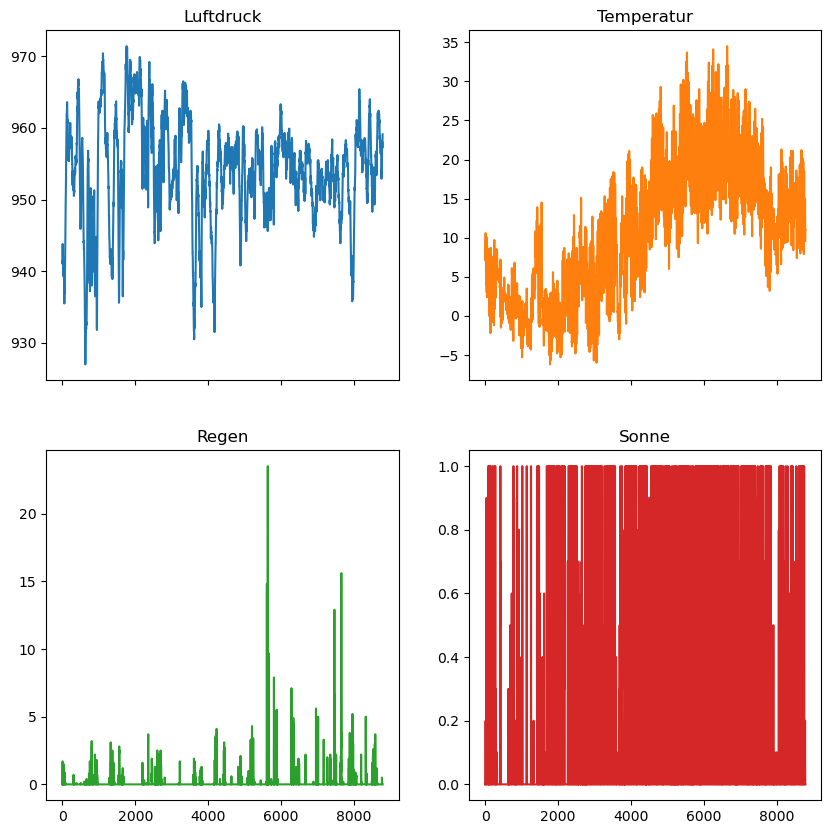

In [49]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs[0, 0].plot(messbeginn, luftdruck)
axs[0, 0].set_title('Luftdruck')
axs[0, 1].plot(messbeginn, temperaturen, 'tab:orange')
axs[0, 1].set_title('Temperatur')   
axs[1, 0].plot(messbeginn, regen, 'tab:green')
axs[1, 0].set_title('Regen')
axs[1, 1].plot(messbeginn, sonne, 'tab:red')
axs[1, 1].set_title('Sonne')
plt.show()


# interpolation 

**Kontrolle dass die Array die selbe länge haben ansonsten geht die interpolation nicht**

In [50]:
x_data = temperaturen
y_data = messbeginn
print(len(x_data))
print(len(y_data))



7464
7464


In diesem Code werden zunächst die eindeutigen Luftdruckwerte mit der np.unique()-Funktion und die entsprechenden y-Werte basierend auf den eindeutigen Indizes in messbeginn extrahiert. Dann wird die Interpolation wie zuvor durchgeführt, aber mit unique_luftdruck und unique_messbeginn. Der restliche Code bleibt unverändert.

Hinweis: Wenn die Daten sehr stark schwanken oder unregelmäßig sind, kann es sinnvoll sein, die Interpolationsmethode anzupassen oder die Daten zu glätten, bevor Sie die Interpolation durchführen.

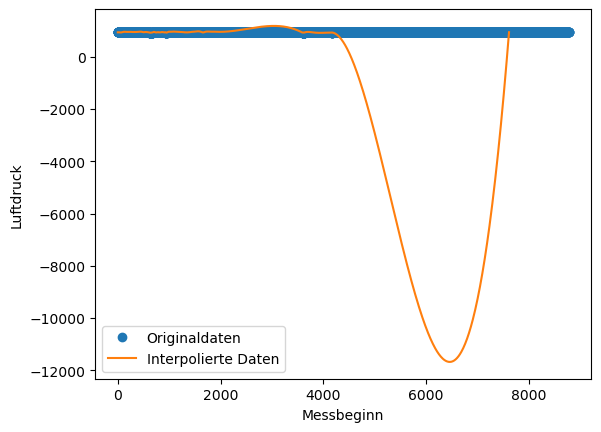

In [51]:
# Beispiel-Daten
luftdruck = np.array(luftdruck)
messbeginn = np.array(messbeginn)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]


# Interpolationsfunktion
interp_func = interp1d(unique_messbeginn, unique_luftdruck, kind='cubic')


# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_messbeginn), np.max(unique_messbeginn), num=len(unique_messbeginn)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten
plt.plot(messbeginn, luftdruck, 'o', label='Originaldaten')
plt.plot(x_interp, y_interp, label='Interpolierte Daten')
plt.xlabel('Messbeginn')
plt.ylabel('Luftdruck')
plt.legend()
plt.show()


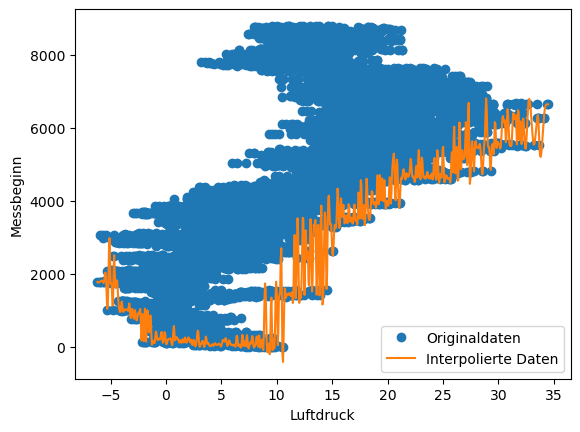

In [52]:
luftdruck = np.array(x_data)
messbeginn = np.array(y_data)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]

# Interpolationsfunktion
interp_func = interp1d(unique_luftdruck, unique_messbeginn, kind='cubic')

# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_luftdruck), np.max(unique_luftdruck), num=len(unique_luftdruck)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten
plt.plot(luftdruck, messbeginn, 'o', label='Originaldaten')
plt.plot(x_interp, y_interp, label='Interpolierte Daten')
plt.xlabel('Luftdruck')
plt.ylabel('Messbeginn')
plt.legend()
plt.show()


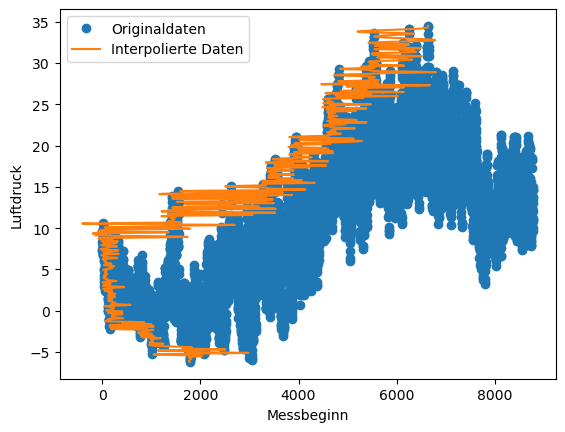

In [53]:
luftdruck = np.array(luftdruck)
messbeginn = np.array(messbeginn)

# Entfernen von Duplikaten im Luftdruck-Array
unique_luftdruck, index = np.unique(luftdruck, return_index=True)
unique_messbeginn = messbeginn[index]

# Interpolationsfunktion
interp_func = interp1d(unique_luftdruck, unique_messbeginn, kind='cubic')

# Neue x-Werte für die Interpolation
x_interp = np.linspace(np.min(unique_luftdruck), np.max(unique_luftdruck), num=len(unique_luftdruck)*2)

# Interpolierte y-Werte
y_interp = interp_func(x_interp)

# Plot der originalen und interpolierten Daten mit getauschten Achsen
fig, ax = plt.subplots()
ax.plot(messbeginn, luftdruck, 'o', label='Originaldaten')
ax.plot(y_interp, x_interp, label='Interpolierte Daten')
ax.set_xlabel('Messbeginn')
ax.set_ylabel('Luftdruck')
ax.legend()
plt.show()


In [54]:
#Chatgpt

def spline_interpolation(x, y):
    """
    Performs a spline interpolation of the input data.

    Parameters
    ----------
    x : array_like
        The x-coordinates of the input data.
    y : array_like
        The y-coordinates of the input data.

    Returns
    -------
    tuple
        A tuple containing the interpolated x and y values.
    """
    # Perform the spline interpolation
    f = interp1d(x, y, kind='cubic')

    # Define the new x values to interpolate at
    x_new = np.linspace(x.min(), x.max(), 1000)

    # Interpolate the y values at the new x values
    y_new = f(x_new)

    return x_new, y_new


In [55]:
#chatgpt

def spline_interpolation(x, y):
    """
    Performs a spline interpolation of the input data and plots the interpolated function.

    Parameters
    ----------
    x : array_like
        The x-coordinates of the input data.
    y : array_like
        The y-coordinates of the input data.

    Returns
    -------
    tuple
        A tuple containing the interpolated x and y values.
    """
    # Perform the spline interpolation
    f = interp1d(x, y, kind='cubic')

    # Define the new x values to interpolate at
    x_new = np.linspace(x.min(), x.max(), 1000)

    # Interpolate the y values at the new x values
    y_new = f(x_new)

    # Plot the interpolated function
    fig, ax = plt.subplots()
    ax.plot(x, y, '-', label='Original data')
    ax.plot(x_new, y_new, label='Interpolated function')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Spline Interpolation')

    plt.show()
    return x_new, y_new
    


In [56]:
# mithilfe von Chatgpt gelöst, ziel ist es noch zu vereinfachen
# und besser zu gestalten
# z.B Y achse ist nicht sinngemäss beschriftet 



def plot_interpolierte_werte(x_list, y_list):
    """
    Interpoliert die Eingabedaten und plottet die interpolierten Kurven auf verschiedenen Subplots.

    Parameter
    ---------
    x_list : Liste von Array
        Eine Liste von x-Koordinaten für jeden Eingabedatensatz.
    y_list : Liste von Array
        Eine Liste von y-Koordinaten für jeden Eingabedatensatz.

    Rückgabe
    --------
    Plot
    """
    # Definiere die neuen x-Werte, für die interpoliert werden soll
    x_neu = np.linspace(
        min([x.min() for x in x_list]), max([x.max() for x in x_list]), 1000
    )

    # Interpoliere die y-Werte für die neuen x-Werte für jeden Eingabedatensatz
    y_neu = [interp1d(x, y, kind="cubic")(x_neu) for x, y in zip(x_list, y_list)]

    # Plotte die interpolierten Kurven auf verschiedenen Subplots
    fig, axs = plt.subplots(len(y_list), (1), figsize=(8, 8))

    for i, (x, y, y_neu) in enumerate(zip(x_list, y_list, y_neu)):
        axs[i].plot(x, y, "-", label="Ursprüngliche Daten")
        axs[i].plot(x_neu, y_neu, label="Interpolierte Funktion")
        axs[i].legend()
        axs[i].set_xlabel("Messbeginn")
        axs[i].set_ylabel("Y")
        axs[i].set_title(f"Interpolation {i+1}")

    plt.tight_layout()
    plt.show()



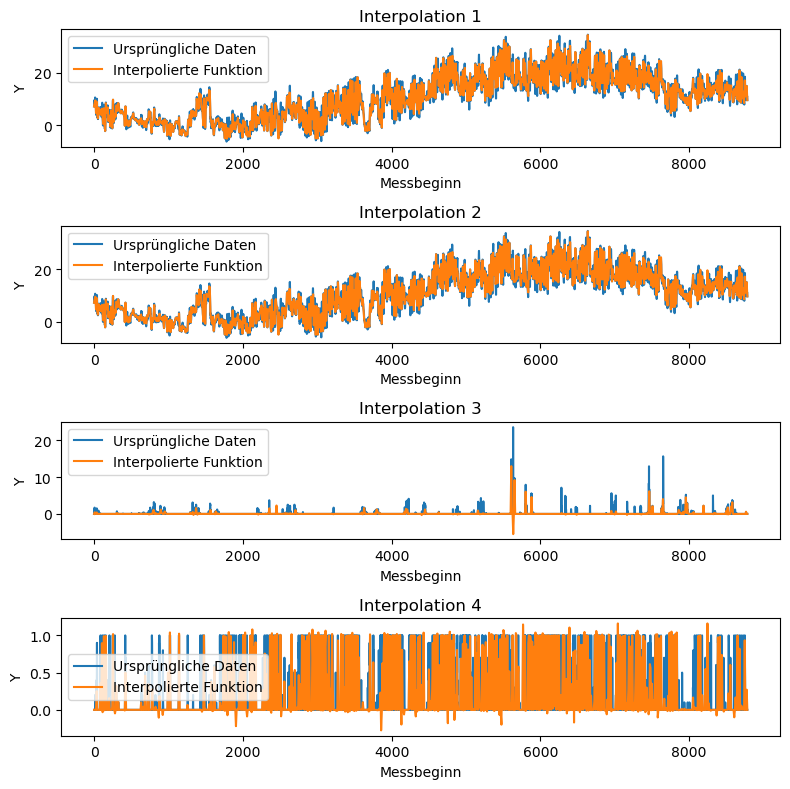

In [57]:
plot_interpolierte_werte([messbeginn, messbeginn, messbeginn, messbeginn],
                       [temperaturen, luftdruck, regen, sonne])

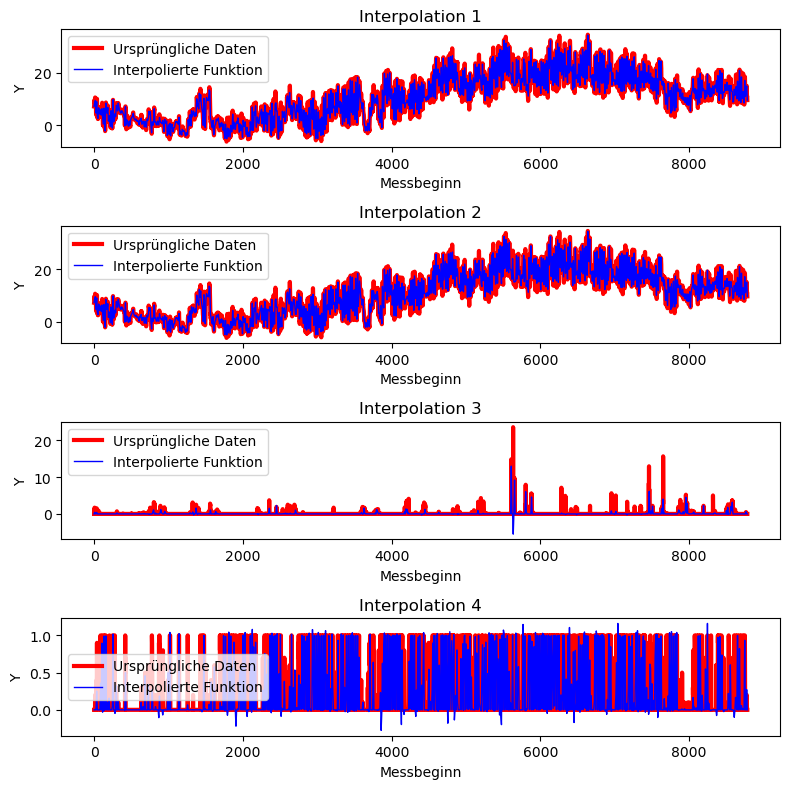

In [68]:
# Eingabedaten
x_list = ([messbeginn, messbeginn, messbeginn, messbeginn])
y_list = ([temperaturen, luftdruck, regen, sonne])

# Definiere die neuen x-Werte, für die interpoliert werden soll
x_neu = np.linspace(
    min([x.min() for x in x_list]), max([x.max() for x in x_list]), 1000
)

# Interpoliere die y-Werte für die neuen x-Werte für jeden Eingabedatensatz
y_neu = [interp1d(x, y, kind="cubic")(x_neu) for x, y in zip(x_list, y_list)]

# Plotte die interpolierten Kurven auf verschiedenen Subplots
fig, axs = plt.subplots(len(y_list), (1), figsize=(8, 8))

for i, (x, y, y_neu) in enumerate(zip(x_list, y_list, y_neu)):
    axs[i].plot(x, y, "-", color="red", linewidth=3, label="Ursprüngliche Daten")
    axs[i].plot(x_neu, y_neu,color="blue", linewidth=1,  label="Interpolierte Funktion")
    axs[i].legend()
    axs[i].set_xlabel("Messbeginn")
    axs[i].set_ylabel("Y")
    axs[i].set_title(f"Interpolation {i+1}")

plt.tight_layout()
plt.show()


In [69]:
def plot_interpolierte_werte(x_list, y_list, x_limits=None, line_colors=None, line_widths=None):
    """
    Interpoliert die Eingabedaten und plottet die interpolierten Kurven auf verschiedenen Subplots.

    Parameter
    ---------
    x_list : Liste von Array
        Eine Liste von x-Koordinaten für jeden Eingabedatensatz.
    y_list : Liste von Array
        Eine Liste von y-Koordinaten für jeden Eingabedatensatz.
    x_limits : Liste von Tupeln, optional
        Eine Liste von Tupeln (min, max) für die x-Limits jedes Subplots.
        Wenn nicht angegeben, werden die x-Limits automatisch festgelegt.
    line_colors : Liste von Farben, optional
        Eine Liste von Farben für jede Linie.
        Wenn nicht angegeben, werden die Standardfarben verwendet.
    line_widths : Liste von Linienbreiten, optional
        Eine Liste von Linienbreiten für jede Linie.
        Wenn nicht angegeben, werden die Standardlinienbreiten verwendet.

    Rückgabe
    --------
    Plot
    """
    # Definiere die neuen x-Werte, für die interpoliert werden soll
    x_neu = np.linspace(
        min([x.min() for x in x_list]), max([x.max() for x in x_list]), 1000
    )

    # Interpoliere die y-Werte für die neuen x-Werte für jeden Eingabedatensatz
    y_neu = [interp1d(x, y, kind="cubic")(x_neu) for x, y in zip(x_list, y_list)]

    # Plotte die interpolierten Kurven auf verschiedenen Subplots
    fig, axs = plt.subplots(len(y_list), (1), figsize=(8, 8))

    for i, (x, y, y_neu) in enumerate(zip(x_list, y_list, y_neu)):
        # Bestimme die x-Limits für den aktuellen Plot
        if x_limits is not None:
            axs[i].set_xlim(x_limits[i])
        else:
            axs[i].set_xlim(x.min(), x.max())

        # Wähle die Farbe und Linienbreite für die aktuelle Linie
        color = line_colors[i] if line_colors is not None else None
        width = line_widths[i] if line_widths is not None else None

        # Plotte die interpolierten Kurven auf dem aktuellen Subplot
        axs[i].plot(x, y, "-", label="Ursprüngliche Daten", color=color, linewidth=width)
        axs[i].plot(x_neu, y_neu, label="Interpolierte Funktion", color=color, linewidth=width)
        axs[i].legend()
        axs[i].set_xlabel("Messbeginn")
        axs[i].set_ylabel("Y")
        axs[i].set_title(f"Interpolation {i+1}")

    plt.tight_layout()
    plt.show()


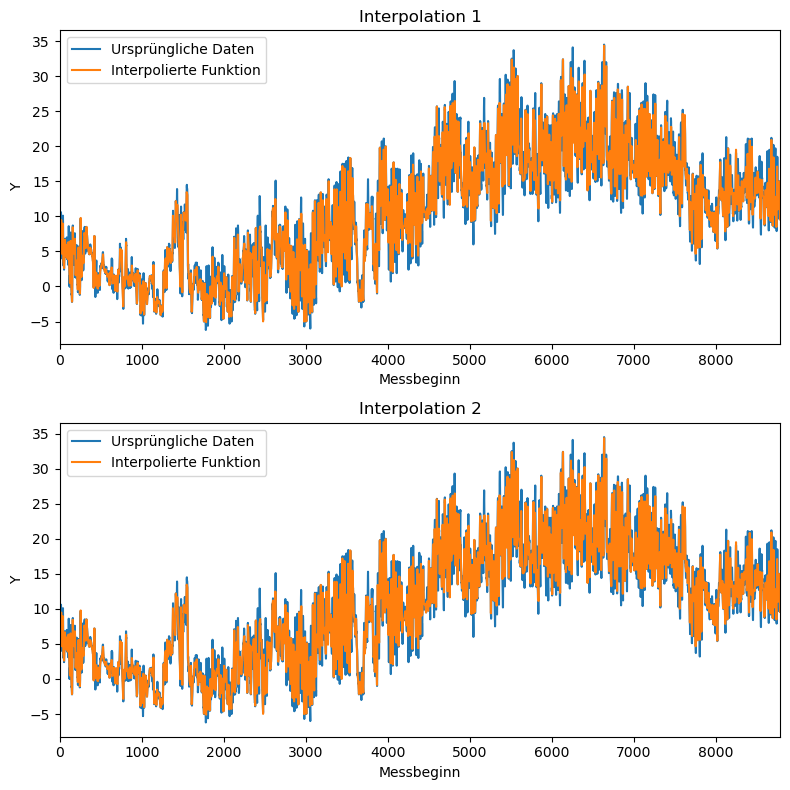

In [70]:
plot_interpolierte_werte([messbeginn, messbeginn],
                       [temperaturen, luftdruck])